In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation

from IPython.display import HTML

%matplotlib inline

In [2]:
rand_state = np.random.RandomState(42)

# Just for Fun

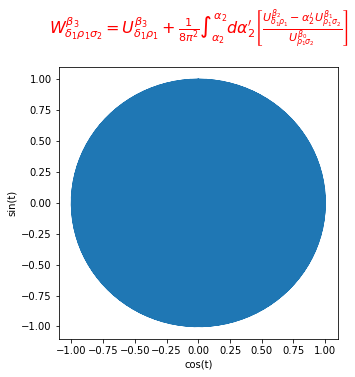

In [3]:
math_exp = { 0 : r"$W^{\beta_3}_{\delta_1 \rho_1 \sigma_2} = "
    r"U^{\beta_3}_{\delta_1 \rho_1} + \frac{1}{8 \pi^2} "
    r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
    r"U^{\beta_2}_{\delta_1 \rho_1} - \alpha^\prime_2U^{\beta_1}_"
    r"{\rho_1 \sigma_2} }{U^{\beta_0}_{\rho_1 \sigma_2}}\right]$" }

# Creating figure and axis.
t = np.linspace(0.0, 1.0, 100)
x = np.cos(4 * np.pi * t)
y = np.sin(4 * np.pi * t)
#s = np.cos(4 * np.pi * t) + 2

fig = plt.figure(figsize=(5, 5))

plt.plot(y, x)
plt.fill(x, y)

plt.xlabel("cos(t)")
plt.ylabel("sin(t)")
plt.title(math_exp[0], fontsize=16, color='r', position=(0.5,1.1))

plt.show()

In [4]:
def heart(fuzzy=True):
    t = np.arange(0, 2*np.pi, 0.001)
    x = 16*np.sin(t) ** 3
    y = 13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t)
    if fuzzy:
        x += 0.5*rand_state.randn(*t.shape)
        y += 0.5*rand_state.randn(*t.shape)
#        fuzz = 0.5*rand_state.randn(*t.shape)
#        x += fuzz
#        y += fuzz
    return x,y

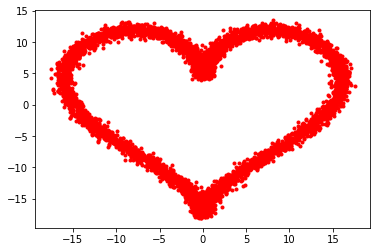

In [5]:
x,y = heart(True)
plt.plot(x,y,'r.')

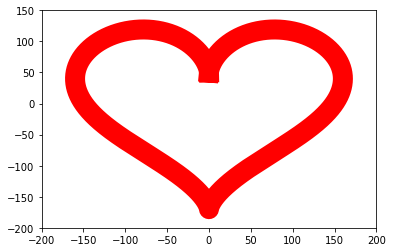

In [6]:
fig, ax = plt.subplots()

ax.set_xlim((-200, 200))
ax.set_ylim((-200, 150))

x,y = heart(False)
line, = ax.plot(10*x, 10*y, lw=20, color="red")

In [7]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x,y = heart(False)
    x = (10+i/40.0)*x
    y = (10+i/50.0)*y
    line.set_data(x, y)
    line.set_color("red")
    line.set_linewidth(20)
    return (line,)

In [8]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=10, 
                               blit=True)

HTML(anim.to_jshtml())